## 1. Importer les Bibs

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Style pour les graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Chargement des Données Brutes

In [2]:
df_raw = pd.read_csv('data/output_dataset.csv')

print(f"📁 Nombre total de lignes: {len(df_raw)}")
print(f"📊 Nombre de colonnes: {len(df_raw.columns)}")
print(f"\n📋 Colonnes disponibles:\n{list(df_raw.columns)}")

📁 Nombre total de lignes: 50
📊 Nombre de colonnes: 15

📋 Colonnes disponibles:
['code', 'url', 'titre', 'contenu', 'langue', 'nb_caracteres', 'nb_mots', 'date_publication', 'lieu', 'maladie', 'animal', 'source_publication', 'resume_50_mots', 'resume_100_mots', 'resume_150_mots']


In [3]:
df_raw.head()

,code,url,titre,contenu,langue,nb_caracteres,nb_mots,date_publication,lieu,maladie,animal,source_publication,resume_50_mots,resume_100_mots,resume_150_mots
0,code1050,https://www.elkhabar.com/societe/%D8%A7%D9%84%D8%A8%D9%84%D9%8A%D8%AF%D8%A9-%D9%85%D8%B1%D8%B6-%...,البليدة: مرض غريب يقضي على الأبقار,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,ar,834,145,18-06-2024,Algérie (بليدة),Maladie des abattis,Abovins (abattis),médias,Des abattis algériens sont touchés par une maladie mystérieuse qui les rend inaptes à la reprodu...,"Une maladie mystérieuse affecte des abattis en Algérie, rendant-les incapables de se reproduire....","Une maladie mystérieuse a été détectée chez des abattis en Algérie, affectant leur capacité à se..."
1,code1051,https://www.mystateline.com/news/local-news/west-nile-virus-detected-in-winnebago-county/,Titre non trouvé,Contenu non récupéré,fr,20,3,inconnue,inconnu,inconnue,inconnu,médias,NaN,NaN,NaN
2,code1052,https://www.wattagnet.com/poultry-meat/diseases-health/avian-influenza/article/15677890/more-min...,More Minnesota turkeys struck by avian influenza,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,en,2180,354,18-06-2024,Minnesota (États-Unis),Avian influenza H5N1,Dindon de poule,médias,Une épidémie d'avian influenza H5N1 a été détectée dans une ferme de dinde de poule en Minnesota...,L'épidémie a été confirmée le 13 juin 2024 dans une ferme de dinde de poule du comté de Stearns....,"Depuis le début de l'épidémie en 2022-24, aucun État n'a eu plus de fermes affectées que Minneso..."
3,code1053,https://thehorse.com/1128529/2-california-horses-positive-for-ehm/,thehorse.com,thehorse.com Nous vérifions que vous êtes humain. Cette opération peut prendre quelques secondes...,fr,239,32,inconnue,inconnu,inconnue,inconnu,médias,Aucune information sur une maladie animale spécifique.,Aucune information sur une maladie animale spécifique. Le site thehorse.com semble être un site ...,Le site thehorse.com est probablement lié à une opération de vérification d'identité et de sécur...
4,code1054,https://urls.fr/BRHFco,نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,ar,1236,203,19-06-2024,Algérie (wilaya de Blida),Maladie du gelon des bovins,Bœuf,médias,"Des cas de gelon des bovins ont été signalés à Blida, en Algérie. Le mftch biotri a identifié la...","Un mftch biotri a révélé que des cas de gelon des bovins ont été signalés à Blida, en Algérie. L...","Des cas de gelon des bovins ont été signalés à Blida, en Algérie. Le mftch biotri a identifié la..."


In [4]:
print("INFORMATIONS GÉNÉRALES")
df_raw.info()

INFORMATIONS GÉNÉRALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   code                50 non-null     object
 1   url                 50 non-null     object
 2   titre               50 non-null     object
 3   contenu             50 non-null     object
 4   langue              50 non-null     object
 5   nb_caracteres       50 non-null     int64 
 6   nb_mots             50 non-null     int64 
 7   date_publication    50 non-null     object
 8   lieu                50 non-null     object
 9   maladie             50 non-null     object
 10  animal              50 non-null     object
 11  source_publication  50 non-null     object
 12  resume_50_mots      47 non-null     object
 13  resume_100_mots     47 non-null     object
 14  resume_150_mots     47 non-null     object
dtypes: int64(2), object(13)
memory usage: 6.0+ KB


In [5]:
print("STATISTIQUES DESCRIPTIVES")
df_raw.describe()

STATISTIQUES DESCRIPTIVES


,nb_caracteres,nb_mots
count,50.000000,50.000000
mean,1926.200000,308.500000
std,2241.202565,341.847755
min,16.000000,3.000000
25%,270.250000,45.750000
50%,1308.500000,217.000000
75%,2693.750000,438.750000
max,12741.000000,1899.000000


## 3.1 Vérification des Valeurs Manquantes

In [10]:
text_columns = ['code', 'titre', 'contenu', 'langue', 'lieu', 'maladie', 'animal', 'source_publication',
                'resume_50_mots', 'resume_100_mots', 'resume_150_mots']

df_raw[text_columns] = df_raw[text_columns].apply(lambda x: x.astype(str).str.lower())
df_raw.replace({'nan': ''}, inplace=True)

In [11]:
# Calculer le pourcentage de valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': df_raw.columns,
    'Valeurs_Manquantes': df_raw.isnull().sum(),
    'Pourcentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
})

missing_data = missing_data[missing_data['Valeurs_Manquantes'] > 0].sort_values(
    'Pourcentage', ascending=False
)

print("\n🔍 ANALYSE DES VALEURS MANQUANTES:")
print(missing_data.to_string(index=False))


🔍 ANALYSE DES VALEURS MANQUANTES:
Empty DataFrame
Columns: [Colonne, Valeurs_Manquantes, Pourcentage]
Index: []


In [12]:
# Ensure the column is treated as string and cleaned
df_raw['resume_50_mots'] = df_raw['resume_50_mots'].astype(str).str.strip().str.lower()

# Drop rows where resume_50_mots is "résumé indisponible"
df_raw = df_raw[df_raw['resume_50_mots'] != 'résumé indisponible.']

# Optional: reset index
df_raw = df_raw.reset_index(drop=True)

In [13]:
# Ensure the column is treated as string and cleaned
df_raw['resume_50_mots'] = df_raw['resume_50_mots'].astype(str).str.strip().str.lower()

# Drop rows where resume_50_mots is "résumé indisponible"
df_raw = df_raw[df_raw['resume_50_mots'] != 'Aucun contenu disponible pour le moment.']

# Optional: reset index
df_raw = df_raw.reset_index(drop=True)

In [14]:
# Ensure the column is treated as string and cleaned
df_raw['resume_50_mots'] = df_raw['resume_50_mots'].astype(str).str.strip().str.lower()

# Drop rows where resume_50_mots is "résumé indisponible"
df_raw = df_raw[df_raw['resume_50_mots'] != 'aucune information sur une maladie animale spécifique.']

# Optional: reset index
df_raw = df_raw.reset_index(drop=True)

In [11]:
# Drop rows where 'resume_50_mots' is null (NaN, None, or empty after stripping)
df_raw = df_raw.dropna(subset=['resume_50_mots'])  # removes NaN/None
df_raw = df_raw[df_raw['resume_50_mots'].astype(str).str.strip() != '']  # removes empty strings

# Optional: reset index
df_raw = df_raw.reset_index(drop=True)

In [12]:
# 4. Drop rows with specific code values
codes_to_drop = {'code1055', 'code1062', 'code1064', 'code1077', 'code1088', 'code1090', 'code1092','code1075', 'code1084'}
df_raw = df_raw[~df_raw['code'].isin(codes_to_drop)]

# Reset index
df_raw = df_raw.reset_index(drop=True)

In [13]:
# Replace 'titre non trouvé' (case-insensitive) with the corresponding 'maladie' value
mask = df_raw['titre'].str.lower().str.strip() == 'titre non trouvé'
df_raw.loc[mask, 'titre'] = df_raw.loc[mask, 'maladie']

In [14]:
# Replace 'vidéo' (case-insensitive) with the corresponding 'maladie' value
mask = df_raw['titre'].str.lower().str.strip() == 'vidéo'
df_raw.loc[mask, 'titre'] = df_raw.loc[mask, 'maladie']

Distribution (counts):
langue
ar    17
en    12
fr     2
Name: count, dtype: int64


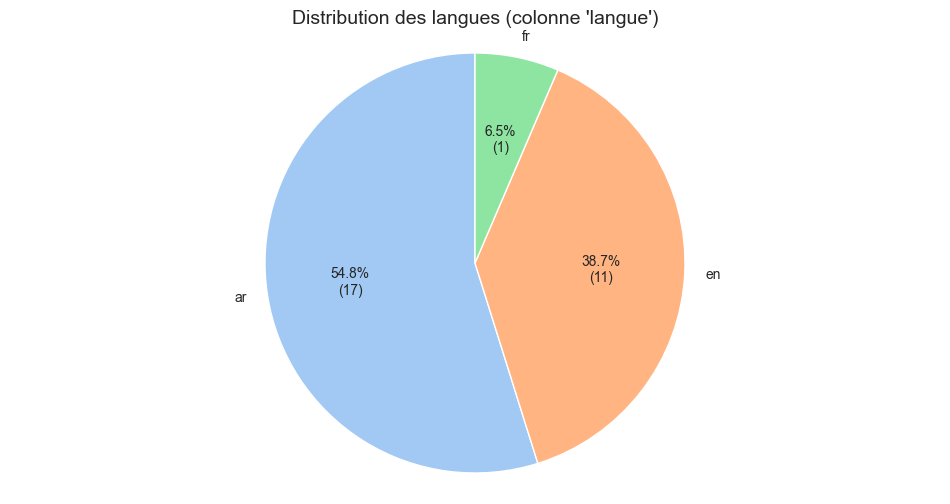

In [15]:
# afficher la distribution de la colonne 'langue' sous forme de camembert
lang_counts = df_raw['langue'].fillna('inconnu').value_counts()

print("Distribution (counts):")
print(lang_counts)

fig, ax = plt.subplots()
colors = sns.color_palette('pastel', len(lang_counts))
ax.pie(
    lang_counts,
    labels=lang_counts.index,
    autopct=lambda p: f"{p:.1f}%\n({int(p * lang_counts.sum() / 100)})",
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
ax.set_title("Distribution des langues (colonne 'langue')", fontsize=14)
ax.axis('equal')  # cercle
plt.show()

In [16]:
from deep_translator import GoogleTranslator

# Define fields to translate
fields_to_translate = [
    'titre', 'contenu', 'lieu', 'maladie', 'animal',
    'resume_50_mots', 'resume_100_mots', 'resume_150_mots'
]

# Initialize translator
translator = GoogleTranslator(source='auto', target='fr')

def safe_translate(text):
    text_str = str(text).strip()
    if pd.isna(text) or text_str.lower() in ['inconnu', 'inconnue', 'null', 'nan', '']:
        return text
    try:
        translated = translator.translate(text_str)
        return translated if translated else text
    except Exception as e:
        print(f"Translation error for '{text}': {e}")
        return text

# Apply translation ONLY where langue is 'ar' or 'en'
mask = df_raw['langue'].isin(['ar', 'en'])

for col in fields_to_translate:
    if col in df_raw.columns:
        print(f"Translating column: {col}")
        # Apply translation only to rows where langue is 'ar' or 'en'
        df_raw.loc[mask, col] = df_raw.loc[mask, col].apply(safe_translate)

# Save result
print("✅ Translation completed and saved to 'output_dataset_fr.csv'")

Translating column: titre
Translating column: contenu
Translation error for 'skip to main content china reports another fatal h5n6 avian flu case news brief june 20, 2024 lisa schnirring topics avian influenza (bird flu) share china has reported another fatal human infection involving h5n6 avian flu, its third of the year, according to an avian influenza update from the world health organization (who) western pacific regional office. juhan sonin / flickr cc the patient is a 41-year man from fujian province in the country's southeast whose symptoms began on may 8. he had severe pneumonia and was hospitalized, where his respiratory samples tested positive on may 14. he died from his infection. the report did not say how the man is thought to have contracted the virus. china's last h5n6 case, reported in may, was also from fujian province and likewise fatal. h5n6 is known to circulate in poultry in china and a few other asian countries. infections in humans are often severe or fatal. so f

KeyboardInterrupt: 

In [17]:
# Translate only the row(s) whose 'code' contains '1089' and show before/after
code_search = '1089'
rows = df_raw.index[df_raw['code'].astype(str).str.contains(code_search)].tolist()

if not rows:
    print(f"No rows found with code containing '{code_search}'")
else:
    for i in rows:
        print("=== BEFORE ===")
        display(df_raw.loc[[i], fields_to_translate + ['langue']])
        # translate each text field present in the row
        for col in fields_to_translate:
            if col in df_raw.columns:
                df_raw.at[i, col] = safe_translate(df_raw.at[i, col])
        # update language to French
        df_raw.at[i, 'langue'] = 'fr'
        print("=== AFTER ===")
        display(df_raw.loc[[i], fields_to_translate + ['langue']])

=== BEFORE ===


,titre,contenu,lieu,maladie,animal,resume_50_mots,resume_100_mots,resume_150_mots,langue
22,Une grande campagne en Irak pour vacciner le bétail contre la fièvre aphteuse,54 حملة كبرى في العراق لتلقيح الماشية ضد الحمى القلاعية محليات 2024-07-01 | 08:47 782 شوهد السوم...,Irak,Fièvre aphteuse,"Vaches, buffles, moutons, chèvres",Une campagne nationale gratuite pour vacciner le bétail contre la fièvre aphteuse,حملة وطنية مجانية لتلقيح الماشية ضد مرض الحمى القلاعية، تستهدف تحصين الأبقار والجاموس والأغنام و...,حملة وطنية مجانية لتلقيح الماشية ضد مرض الحمى القلاعية، تستهدف تحصين الأبقار والجاموس والأغنام و...,ar


Translation error for '54 حملة كبرى في العراق لتلقيح الماشية ضد الحمى القلاعية محليات 2024-07-01 | 08:47 782 شوهد السومرية نيوز – محليات دشنت وزارة الزراعة، اليوم الاثنين، حملة وطنية مجانية لتلقيح الماشية ضد مرض الحمى القلاعية، وتستمر لـ 30 يوما، داعية المربين إلى التعاون لحماية قطعانهم من المرض الخطير. وأفاد مدير عام دائرة البيطرة التابعة للوزارة الدكتور ثامر حبيب حمزة الخفاجي، بأن الحملة التي ستشمل جميع المحافظات باستثناء الإقليم، تستهدف تحصين الأبقار والجاموس والأغنام والماعز بجميع الأعمار، ضد الحمى القلاعية، الذي عده من الأمراض الخطيرة على الثروة الحيوانية. وبين أنه سيتم توزيع اللقاحات بين جميع المستشفيات والمستوصفات البيطرية، التي تم تسلم الوجبة الأولى منها، البالغ عددها خمسة ملايين، والتي ستليها وجبة ثانية تبلغ أربعة ملايين، بعد إتمام الفحوصات الحقلية والمختبرية. من جانبه دعا مدير المستشفى البيطري في كركوك الدكتور صباح نوري حسن، فلاحي ومربي الماشية في المحافظة، إلى عدم الإحجام عن عملية التحصين، حفاظاً على الثروة الحيوانية كمصدر مهم من مصادر الإنتاج الغذائي والدخل القومي لكركوك و

,titre,contenu,lieu,maladie,animal,resume_50_mots,resume_100_mots,resume_150_mots,langue
22,Une grande campagne en Irak pour vacciner le bétail contre la fièvre aphteuse,54 حملة كبرى في العراق لتلقيح الماشية ضد الحمى القلاعية محليات 2024-07-01 | 08:47 782 شوهد السوم...,Irak,Fièvre aphteuse,"Vaches, buffles, moutons, chèvres",Une campagne nationale gratuite pour vacciner le bétail contre la fièvre aphteuse,"Une campagne nationale gratuite de vaccination du bétail contre la fièvre aphteuse, qui vise à v...","Une campagne nationale gratuite de vaccination du bétail contre la fièvre aphteuse, qui vise à v...",fr


In [ ]:
from deep_translator import GoogleTranslator
import time
import random

def safe_translate_with_retry(text, retries=3, delay=1):
    if pd.isna(text) or str(text).strip().lower() in ['inconnu', 'inconnue', 'null', 'nan', '']:
        return text

    for attempt in range(retries):
        try:
            translated = GoogleTranslator(source='auto', target='fr').translate(str(text))
            return translated if translated else text
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                time.sleep(delay + random.uniform(0, 1))  # Add jitter
            else:
                print(f"Failed to translate after {retries} attempts: '{text}'")
                return text  # fallback to original
            

mask = df_raw['langue'].isin(['ar', 'en'])
for col in fields_to_translate:
    if col in df_raw.columns:
        print(f"Translating column: {col}")
        df_raw.loc[mask, col] = df_raw.loc[mask, col].apply(
            lambda x: safe_translate_with_retry(x, retries=3, delay=2)
        )

Translating column: titre
Translating column: contenu
Attempt 1 failed: skip to main content china reports another fatal h5n6 avian flu case news brief june 20, 2024 lisa schnirring topics avian influenza (bird flu) share china has reported another fatal human infection involving h5n6 avian flu, its third of the year, according to an avian influenza update from the world health organization (who) western pacific regional office. juhan sonin / flickr cc the patient is a 41-year man from fujian province in the country's southeast whose symptoms began on may 8. he had severe pneumonia and was hospitalized, where his respiratory samples tested positive on may 14. he died from his infection. the report did not say how the man is thought to have contracted the virus. china's last h5n6 case, reported in may, was also from fujian province and likewise fatal. h5n6 is known to circulate in poultry in china and a few other asian countries. infections in humans are often severe or fatal. so far on

In [ ]:
from deep_translator import GoogleTranslator, MyMemoryTranslator
from langdetect import detect, LangDetectException
import time
from tqdm import tqdm
import re

# Charger le dataset
df = df_raw.copy()

# CORRECTION : Utiliser 'arabic' au lieu de 'ar' pour MyMemory
translator_google = GoogleTranslator(source='auto', target='fr')
translator_mymemory = MyMemoryTranslator(source='arabic', target='french')

# Dictionnaire de traduction (inchangé)
ANIMAUX_DICT = {
    'aghnam': 'ovins', 'agnam': 'ovins', 'abqar': 'bovins', 
    'abkar': 'bovins', 'maaez': 'caprins', 'maez': 'caprins', 
    'maàz': 'caprins', 'mashia': 'bétail', 'mashiya': 'bétail',
    'dajaj': 'volailles', 'djaj': 'volailles', 'khayl': 'équins',
    'jamal': 'camélidés', 'himaar': 'ânes', 'tair': 'oiseaux',
    'tayour': 'oiseaux', 'dewan': 'volailles',
    'أغنام': 'ovins', 'أبقار': 'bovins', 'ماعز': 'caprins',
    'ماشية': 'bétail', 'دجاج': 'volailles', 'طائر': 'oiseaux',
    'طيور': 'oiseaux', 'خيل': 'équins', 'جمال': 'camélidés',
    'حمير': 'ânes', 'جاموس': 'buffles', 'أبقار وجاموس': 'bovins et buffles',
    'sheep': 'ovins', 'cattle': 'bovins', 'goat': 'caprins',
    'goats': 'caprins', 'poultry': 'volailles', 'chicken': 'volailles',
    'birds': 'oiseaux', 'livestock': 'bétail', 'cows': 'bovins',
    'buffalo': 'buffles', 'vaches': 'bovins', 'moutons': 'ovins',
    'chèvres': 'caprins', 'poulets': 'volailles',
}

def contient_arabe(texte):
    if pd.isna(texte) or str(texte).strip() == '':
        return False
    pattern = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+')
    return bool(pattern.search(str(texte)))

def nettoyer_texte(texte):
    if pd.isna(texte):
        return ''
    texte = str(texte).strip()
    texte = re.sub(r'\s+', ' ', texte)
    return texte

def traduire_noms_animaux(texte):
    if pd.isna(texte) or str(texte).strip() == '':
        return texte
    
    texte_original = str(texte)
    texte_nettoye = nettoyer_texte(texte_original)
    
    animaux = [a.strip() for a in texte_nettoye.split(',')]
    animaux_traduits = []
    
    for animal in animaux:
        if not animal:
            continue
            
        animal_lower = animal.lower().strip()
        traduit = False
        
        if animal_lower in ANIMAUX_DICT:
            animaux_traduits.append(ANIMAUX_DICT[animal_lower].capitalize())
            traduit = True
        elif animal in ANIMAUX_DICT:
            animaux_traduits.append(ANIMAUX_DICT[animal].capitalize())
            traduit = True
        else:
            for key, value in ANIMAUX_DICT.items():
                if key in animal_lower or animal_lower in key:
                    animaux_traduits.append(value.capitalize())
                    traduit = True
                    break
        
        if not traduit:
            try:
                if contient_arabe(animal):
                    traduction = traduire_avec_retry(animal, use_backup=True)
                    animaux_traduits.append(traduction.capitalize())
                else:
                    animaux_traduits.append(animal)
            except Exception:
                animaux_traduits.append(animal)
    
    animaux_uniques = []
    for a in animaux_traduits:
        if a.lower() not in [x.lower() for x in animaux_uniques]:
            animaux_uniques.append(a)
    
    return ', '.join(animaux_uniques)

def est_francais(texte):
    if pd.isna(texte) or str(texte).strip() == '':
        return True
    
    if contient_arabe(texte):
        return False
    
    try:
        echantillon = str(texte)[:200].strip()
        if len(echantillon) < 3:
            return True
        langue = detect(echantillon)
        return langue == 'fr'
    except LangDetectException:
        return True
    except Exception:
        return True

def traduire_avec_retry(texte, max_tentatives=3, delai_initial=2, use_backup=True):
    """
    Traduit avec retry et service backup (MyMemory)
    """
    texte_limite = str(texte)[:4999]
    
    # PHASE 1 : Essayer Google Translate avec retry (réduit à 3 tentatives)
    for tentative in range(max_tentatives):
        try:
            traduction = translator_google.translate(texte_limite)
            time.sleep(0.5)
            return traduction
        
        except Exception as e:
            erreur = str(e).lower()
            
            if 'connection' in erreur or 'timeout' in erreur or 'request exception' in erreur:
                if tentative < max_tentatives - 1:
                    delai = delai_initial * (2 ** tentative)
                    print(f"\n⚠️ Google Translate - Erreur réseau (tentative {tentative + 1}/{max_tentatives})")
                    print(f"   Nouvelle tentative dans {delai}s...")
                    time.sleep(delai)
                    continue
                else:
                    print(f"\n⚠️ Google Translate échoué après {max_tentatives} tentatives")
                    break
            else:
                print(f"\n⚠️ Erreur Google Translate: {e}")
                break
    
    # PHASE 2 : Essayer MyMemory comme backup (si arabe détecté)
    if use_backup and contient_arabe(texte):
        print(f"   🔄 Tentative avec service backup (MyMemory)...")
        try:
            # MyMemory a une limite de 500 caractères par requête
            if len(texte_limite) > 500:
                # Découper en morceaux de 450 caractères (marge de sécurité)
                morceaux = [texte_limite[i:i+450] for i in range(0, len(texte_limite), 450)]
                traductions = []
                
                for idx, morceau in enumerate(morceaux):
                    print(f"      Traduction morceau {idx+1}/{len(morceaux)}...")
                    trad = translator_mymemory.translate(morceau)
                    traductions.append(trad)
                    time.sleep(1.5)  # MyMemory nécessite un délai plus long
                
                resultat = ' '.join(traductions)
                print(f"   ✅ Traduit avec succès via MyMemory ({len(morceaux)} morceaux)")
                return resultat
            else:
                traduction = translator_mymemory.translate(texte_limite)
                time.sleep(1)
                print(f"   ✅ Traduit avec succès via MyMemory")
                return traduction
        
        except Exception as e:
            print(f"   ❌ MyMemory aussi en échec: {e}")
    
    # PHASE 3 : Si tout échoue, garder l'original
    print(f"   ⚠️ Texte original conservé (début): {str(texte)[:100]}...")
    return str(texte)

def traduire_si_necessaire(texte, nom_colonne=''):
    if pd.isna(texte):
        return texte
    
    texte_str = str(texte).strip()
    
    if texte_str == '':
        return texte_str
    
    if nom_colonne.lower() == 'animal':
        return traduire_noms_animaux(texte_str)
    
    if est_francais(texte_str):
        return texte_str
    
    return traduire_avec_retry(texte_str, use_backup=True)

# ============================================================
# TRADUCTION DES COLONNES
# ============================================================

colonnes_a_traduire = ['titre', 'contenu', 'lieu', 'maladie', 'animal', 
                       'resume_50_mots', 'resume_100_mots', 'resume_150_mots']

print("🚀 Début de la traduction du dataset (Google + MyMemory backup)")
print(f"📁 Fichier source: data/output/dataset_nettoye.csv")
print(f"📊 Nombre de lignes: {len(df)}")
print(f"📋 Colonnes à traiter: {len(colonnes_a_traduire)}\n")

for colonne in colonnes_a_traduire:
    if colonne not in df.columns:
        print(f"⚠️ Colonne '{colonne}' non trouvée, passage à la suivante...")
        continue
    
    print(f"\n{'='*70}")
    print(f"🔄 Traitement de la colonne '{colonne}'")
    print(f"{'='*70}")
    
    if colonne.lower() == 'animal':
        print(f"\n📋 Exemples AVANT traduction:")
        exemples = df[colonne].dropna().unique()[:8]
        for i, ex in enumerate(exemples, 1):
            print(f"   {i}. {ex}")
    
    if colonne.lower() == 'animal':
        nb_a_traduire = len(df[df[colonne].notna()])
    else:
        non_francais = df[colonne].apply(lambda x: not est_francais(x))
        nb_a_traduire = non_francais.sum()
    
    total = len(df)
    
    print(f"\n📊 Statistiques:")
    print(f"   • Total d'entrées: {total}")
    print(f"   • À traiter: {nb_a_traduire}")
    print(f"   • Déjà en français: {total - nb_a_traduire}")
    
    avec_arabe = df[colonne].apply(contient_arabe).sum()
    if avec_arabe > 0:
        print(f"   • Contenant de l'arabe: {avec_arabe}")
    
    if nb_a_traduire > 0:
        print(f"\n⏳ Traduction en cours...")
        df[colonne] = [
            traduire_si_necessaire(texte, colonne)
            for texte in tqdm(df[colonne], desc=f"  {colonne}", 
                            unit="texte", ncols=80)
        ]
        
        if colonne.lower() == 'animal':
            print(f"\n✨ Exemples APRÈS traduction:")
            exemples = df[colonne].dropna().unique()[:8]
            for i, ex in enumerate(exemples, 1):
                print(f"   {i}. {ex}")
        
        print(f"✅ '{colonne}' terminée !")
    else:
        print(f"✓ Aucune traduction nécessaire pour '{colonne}'")

# ============================================================
# SAUVEGARDE
# ============================================================

print(f"\n{'='*70}")
print("💾 Sauvegarde du dataset traduit...")

output_path = 'data/dataset_traduit.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Traduction terminée et sauvegardée dans '{output_path}'!")
print(f"📊 Dataset final: {len(df)} lignes × {len(df.columns)} colonnes")

# ============================================================
# VÉRIFICATION DES TRADUCTIONS MANQUANTES
# ============================================================

print(f"\n{'='*70}")
print("🔍 VÉRIFICATION DES TRADUCTIONS:")
print(f"{'='*70}\n")

for colonne in ['contenu', 'titre', 'resume_50_mots', 'resume_100_mots', 'resume_150_mots']:
    if colonne in df.columns:
        non_traduits = df[df[colonne].apply(contient_arabe)]
        if len(non_traduits) > 0:
            print(f"⚠️ {len(non_traduits)} texte(s) arabe(s) non traduit(s) dans '{colonne}'")
            for idx in non_traduits.index[:3]:
                texte = str(df.loc[idx, colonne])[:100]
                print(f"   • Ligne {idx}: {texte}...")
        else:
            print(f"✅ Tous les textes de '{colonne}' sont traduits")

# ============================================================
# RÉSUMÉ FINAL
# ============================================================

print(f"\n{'='*70}")
print("🐑 RÉSUMÉ - Noms d'animaux traduits:")
print(f"{'='*70}")

if 'animal' in df.columns:
    animaux_uniques = sorted(df['animal'].dropna().unique())
    print(f"\n📋 {len(animaux_uniques)} types d'animaux distincts trouvés:\n")
    
    for i, animal in enumerate(animaux_uniques, 1):
        count = (df['animal'] == animal).sum()
        print(f"   {i:2d}. {animal:<30} ({count} occurrence{'s' if count > 1 else ''})")

print(f"\n{'='*70}")
print("✨ Traitement terminé avec succès !")
print(f"{'='*70}\n")

🚀 Début de la traduction du dataset (Google + MyMemory backup)
📁 Fichier source: data/output/dataset_nettoye.csv
📊 Nombre de lignes: 31
📋 Colonnes à traiter: 8


🔄 Traitement de la colonne 'titre'

📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 1
   • Déjà en français: 30

⏳ Traduction en cours...


  titre: 100%|███████████████████████████████| 31/31 [00:02<00:00, 10.95texte/s]


✅ 'titre' terminée !

🔄 Traitement de la colonne 'contenu'

📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 5
   • Déjà en français: 26
   • Contenant de l'arabe: 2

⏳ Traduction en cours...


  contenu:  61%|█████████████████▊           | 19/31 [00:16<00:07,  1.50texte/s]


⚠️ Google Translate - Erreur réseau (tentative 1/3)
   Nouvelle tentative dans 2s...

⚠️ Google Translate - Erreur réseau (tentative 2/3)
   Nouvelle tentative dans 4s...


  contenu:  61%|█████████████████▊           | 19/31 [00:26<00:07,  1.50texte/s]


⚠️ Google Translate échoué après 3 tentatives
   🔄 Tentative avec service backup (MyMemory)...
      Traduction morceau 1/8...
      Traduction morceau 2/8...
      Traduction morceau 3/8...
      Traduction morceau 4/8...
      Traduction morceau 5/8...
      Traduction morceau 6/8...
      Traduction morceau 7/8...
      Traduction morceau 8/8...


  contenu:  74%|█████████████████████▌       | 23/31 [01:17<00:41,  5.16s/texte]

   ✅ Traduit avec succès via MyMemory (8 morceaux)

⚠️ Google Translate - Erreur réseau (tentative 1/3)
   Nouvelle tentative dans 2s...

⚠️ Google Translate - Erreur réseau (tentative 2/3)
   Nouvelle tentative dans 4s...

⚠️ Google Translate échoué après 3 tentatives
   🔄 Tentative avec service backup (MyMemory)...
      Traduction morceau 1/11...
      Traduction morceau 2/11...
      Traduction morceau 3/11...
      Traduction morceau 4/11...
      Traduction morceau 5/11...
      Traduction morceau 6/11...
      Traduction morceau 7/11...
      Traduction morceau 8/11...
      Traduction morceau 9/11...
      Traduction morceau 10/11...
      Traduction morceau 11/11...


  contenu: 100%|█████████████████████████████| 31/31 [02:47<00:00,  5.40s/texte]

   ✅ Traduit avec succès via MyMemory (11 morceaux)
✅ 'contenu' terminée !

🔄 Traitement de la colonne 'lieu'



📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 12
   • Déjà en français: 19
   • Contenant de l'arabe: 1

⏳ Traduction en cours...


  lieu: 100%|████████████████████████████████| 31/31 [00:34<00:00,  1.10s/texte]


✅ 'lieu' terminée !

🔄 Traitement de la colonne 'maladie'

📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 11
   • Déjà en français: 20

⏳ Traduction en cours...


  maladie: 100%|█████████████████████████████| 31/31 [00:23<00:00,  1.35texte/s]


✅ 'maladie' terminée !

🔄 Traitement de la colonne 'animal'

📋 Exemples AVANT traduction:
   1. abovins (abattis)
   2. dindon de poule
   3. bœuf
   4. bovins, moutons et chèvres
   5. poulet
   6. Laponie
   7. cheval
   8. mosquito (espèce spécifique : tigre d'asie)

📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 31
   • Déjà en français: 0

⏳ Traduction en cours...


  animal: 100%|████████████████████████████| 31/31 [00:00<00:00, 9112.94texte/s]



✨ Exemples APRÈS traduction:
   1. abovins (abattis)
   2. dindon de poule
   3. bœuf
   4. bovins, Ovins
   5. Volailles
   6. Laponie
   7. cheval
   8. mosquito (espèce spécifique : tigre d'asie)
✅ 'animal' terminée !

🔄 Traitement de la colonne 'resume_50_mots'

📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 0
   • Déjà en français: 31
✓ Aucune traduction nécessaire pour 'resume_50_mots'

🔄 Traitement de la colonne 'resume_100_mots'

📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 2
   • Déjà en français: 29
   • Contenant de l'arabe: 2

⏳ Traduction en cours...


  resume_100_mots: 100%|█████████████████████| 31/31 [00:04<00:00,  6.54texte/s]


✅ 'resume_100_mots' terminée !

🔄 Traitement de la colonne 'resume_150_mots'

📊 Statistiques:
   • Total d'entrées: 31
   • À traiter: 2
   • Déjà en français: 29
   • Contenant de l'arabe: 2

⏳ Traduction en cours...


  resume_150_mots: 100%|█████████████████████| 31/31 [00:06<00:00,  4.82texte/s]


✅ 'resume_150_mots' terminée !

💾 Sauvegarde du dataset traduit...


OSError: Cannot save file into a non-existent directory: 'data\output'

In [20]:
output_path = 'data/dataset_traduit.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

In [18]:
df_raw.head(50)

,code,url,titre,contenu,langue,nb_caracteres,nb_mots,date_publication,lieu,maladie,animal,source_publication,resume_50_mots,resume_100_mots,resume_150_mots
0,code1050,https://www.elkhabar.com/societe/%D8%A7%D9%84%D8%A8%D9%84%D9%8A%D8%AF%D8%A9-%D9%85%D8%B1%D8%B6-%...,Blida : Une étrange maladie tue les vaches,Al-Khobar 18/06/2024 - 11:41 Blida : Une étrange maladie tue les vaches. Les éleveurs de vaches ...,ar,834,145,18-06-2024,algérie (بليدة),maladie des abattis,abovins (abattis),médias,des abattis algériens sont touchés par une maladie mystérieuse qui les rend inaptes à la reprodu...,"une maladie mystérieuse affecte des abattis en algérie, rendant-les incapables de se reproduire....","une maladie mystérieuse a été détectée chez des abattis en algérie, affectant leur capacité à se..."
1,code1052,https://www.wattagnet.com/poultry-meat/diseases-health/avian-influenza/article/15677890/more-min...,davantage de dindes du Minnesota frappées par la grippe aviaire,poulets de chair et dindes maladies et santé grippe aviaire davantage de dindes du Minnesota tou...,en,2180,354,18-06-2024,minnesota (états-unis),grippe aviaire h5n1,dindon de poule,médias,une épidémie d'avian influenza h5n1 a été détectée dans une ferme de dinde de poule en minnesota...,l'épidémie a été confirmée le 13 juin 2024 dans une ferme de dinde de poule du comté de stearns....,"depuis le début de l'épidémie en 2022-24, aucun état n'a eu plus de fermes affectées que minneso..."
2,code1054,https://urls.fr/BRHFco,Mort de vaches à Amrousa.. L'inspecteur vétérinaire de Blida en révèle la raison,La mortalité nationale des vaches à Amrousa. L'inspecteur vétérinaire de Blida en révèle la rais...,ar,1236,203,19-06-2024,algérie (wilaya de blida),maladie du gelon des bovins,bœuf,médias,"des cas de gelon des bovins ont été signalés à blida, en algérie. le mftch biotri a identifié la...","un mftch biotri a révélé que des cas de gelon des bovins ont été signalés à blida, en algérie. l...","des cas de gelon des bovins ont été signalés à blida, en algérie. le mftch biotri a identifié la..."
3,code1056,https://www.kenyanews.go.ke/thousands-of-livestock-vaccinated-in-turkana/,des milliers de bétail vaccinés au turkana,"des milliers de têtes de bétail vaccinées à Turkana kna6 19 juin 2024 agriculture, comtés, santé...",en,1922,284,19-06-2024,Turkana (Kenya),maladie des peaux lisses (lumpy skin disease) et autres maladies animales,"bovins, moutons et chèvres",médias,340 000 animaux vaccinés dans le comté de turkana en juin 2024.,une campagne de vaccination massive a été lancée dans le comté de turkana pour lutter contre les...,la campagne de vaccination est menée en collaboration avec concern worldwide et a pour objectif ...
4,code1058,https://www.cidrap.umn.edu/avian-influenza-bird-flu/china-reports-another-fatal-h5n6-avian-flu-case,La Chine signale un autre cas mortel de grippe aviaire H5N6,"skip to main content china reports another fatal h5n6 avian flu case news brief june 20, 2024 li...",en,12741,1899,20-06-2024,échine,grippe aviaire h5n6,poulet,médias,"la chine a signalé un autre cas fatal d'infection humaine par h5n6 avian flu, son troisième de l...","la chine a signalé un autre cas fatal d'infection humaine par h5n6 avian flu, son troisième de l...","la chine a signalé un autre cas fatal d'infection humaine par h5n6 avian flu, son troisième de l..."
5,code1059,https://www.nwemail.co.uk/news/24398310.deadly-incurable-rabbit-disease-reported-furness/,maladie mortelle et incurable du lapin signalée à Furness,maladie mortelle et incurable du lapin signalée à Furness 20 juin 2024 nature pets par Catherine...,en,3191,525,20-06-2024,"furness, royaume-uni",myxomatose,Laponie,médias,une maladie mortelle et incurable a été signalée chez les lapins sauvages à furness. la myxomato...,la myxomatose est une maladie mortelle et incurable qui affecte les lapins sauvages et les lapin...,la myxomatose est une maladie qui a été introduite au royaume-uni en 1953 pour contrôler les pop...
6,code10

In [ ]:
df_raw.shape

(31, 15)

In [ ]:
# Drop rows where 'maladie' is 'inconnu'
df_cleaned = df[df['maladie'] != 'inconnu']

# Optional: Reset index after dropping rows
df_cleaned = df_cleaned.reset_index(drop=True)

In [3]:
df_traduit = pd.read_csv('data/dataset_traduit.csv')

In [9]:
distinct_count = df_traduit['lieu'].nunique()
print(f"There are {distinct_count} distinct values.")

There are 29 distinct values.
